In [1]:
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_cdt
import numpy as np
import patchify
import tensorflow as tf


#Path of the images
IMAGE = "../data/train/999431_sat.jpg"
MASK = "../data/train/999431_mask.png"

#Import images
im = cv2.imread(IMAGE)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
mask = cv2.imread(MASK, cv2.IMREAD_GRAYSCALE)

## Type of ground

In [2]:
classes = [
 'AnnualCrop', 
 'Forest', 
 'HerbaceousVegetation', 
 'Highway', 
 'Industrial', 
 'Pasture', 
 'PermanentCrop', 
 'Residential', 
 'River', 
 'SeaLake'
]

weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
model = tf.keras.models.load_model("ground_finder.keras")

In [225]:
def predict_ground_graph(im:np.array, model, plot=True):

    im_normalised = (im/255.0)

    r = patchify.patchify(im_normalised[:,:,0], (32, 32), step=32)
    g = patchify.patchify(im_normalised[:,:,1], (32, 32), step=32)
    b = patchify.patchify(im_normalised[:,:,2], (32, 32), step=32)

    all_arr = np.stack([r,g,b], axis = 4)

    all_pred = []
    for p in all_arr:
        pred = model.predict(p)
        tmp_p = []
        for c in pred:
            tmp_p.append(weights[np.argmax(c)])
        all_pred.append(tmp_p)

    normalised_w = np.array(all_pred)/np.max(weights)
    if plot:
        plt.subplot(1,2,1)
        plt.title("Initial image")
        plt.imshow(im_normalised)
        plt.axis(False)
        plt.subplot(1,2,2)
        plt.title("Graph weighted")
        plt.imshow(normalised_w, cmap="gray", vmin=0, vmax=4)
        plt.axis(False)

    return normalised_w

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

array([[0.3, 0.3, 0.7, ..., 0.1, 0.7, 0.7],
       [0.1, 0.1, 0.7, ..., 0.1, 0.7, 0.7],
       [0.1, 0.1, 0.1, ..., 0.1, 0.7, 0.7],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.7, ..., 0.1, 0.3, 0.1],
       [0.1, 0.1, 0.1, ..., 0.7, 0.7, 0.1]])

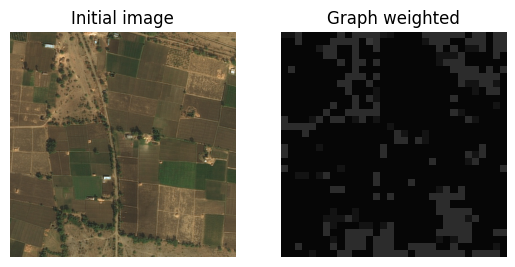

In [226]:
predict_ground_graph(im, model)

## Les masques

(-0.5, 1023.5, 1023.5, -0.5)

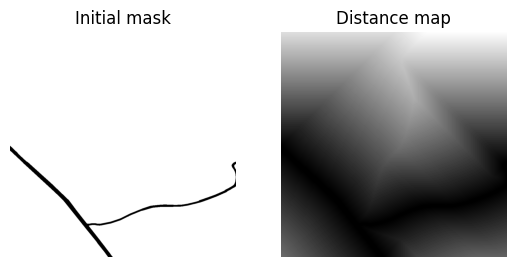

In [125]:
#Inverse 1 and 0
inv_mask = np.logical_not(mask).astype(int)
#Further we are from the road and more it's complex
distance_taxicab = distance_transform_cdt(inv_mask, metric="chessboard")

plt.subplot(1,2,2)
plt.title("Distance map")
plt.imshow(distance_taxicab, cmap="gray")
plt.axis(False)
plt.subplot(1,2,1)
plt.title("Initial mask")
plt.imshow(inv_mask, cmap="gray")
plt.axis(False)

In [126]:
normalised_mask = (distance_taxicab - np.min(distance_taxicab))/np.max(distance_taxicab)

## Les images

(-0.5, 1023.5, 1023.5, -0.5)

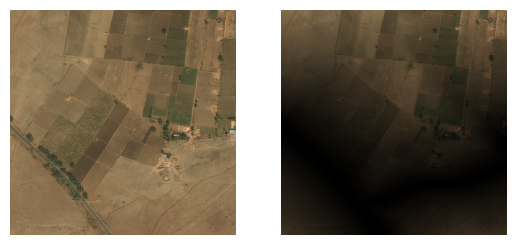

In [127]:
apply_mask = np.multiply(im, np.stack([normalised_mask,normalised_mask,normalised_mask], axis=2))
apply_mask_plot = apply_mask.astype(int)

plt.subplot(1,2,1)
plt.imshow(im)
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(apply_mask_plot)
plt.axis(False)

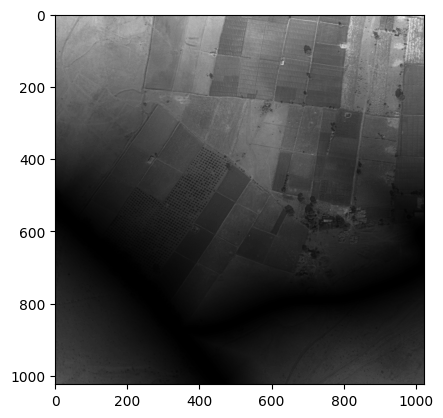

In [128]:
get_the_mean = np.mean(apply_mask, axis=2)
plt.imshow(get_the_mean.astype(int), cmap="gray")

(-0.5, 31.5, 31.5, -0.5)

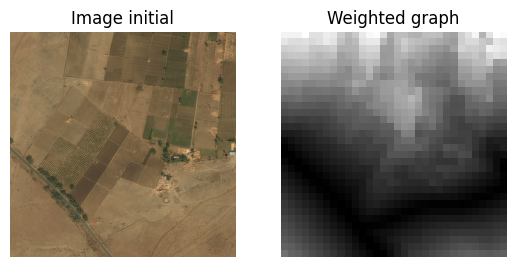

In [131]:
patches = patchify.patchify(get_the_mean, (32, 32), step=32)
mean_second = np.mean(patches.reshape(32, 32, 1024), axis = 2)

plt.subplot(1,2,1)
plt.title("Image initial")
plt.imshow(im, cmap="gray")
plt.axis(False)
plt.subplot(1,2,2)
plt.title("Weighted graph")
plt.imshow(mean_second, cmap="gray")
plt.axis(False)


## Apply it

In [136]:
import glob

masks = glob.glob("../data/train/*.png")
images = glob.glob("../data/train/*.jpg")

In [141]:
def transform_img(im_path:str, mask_path:str, plot = True):
    """

    """

    im = cv2.imread(im_path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    #Inverse 1 and 0
    inv_mask = np.logical_not(mask).astype(int)
    #Further we are from the road and more it's complex
    distance_taxicab = distance_transform_cdt(inv_mask, metric="chessboard")
    normalised_mask = (distance_taxicab - np.min(distance_taxicab))/np.max(distance_taxicab)
    
    apply_mask = np.multiply(im, np.stack([normalised_mask,normalised_mask,normalised_mask], axis=2))
    get_the_mean = np.mean(apply_mask, axis=2)
    
    patches = patchify.patchify(get_the_mean, (32, 32), step=32)
    mean_second = np.mean(patches.reshape(32, 32, 1024), axis = 2)

    if plot:
        plt.subplot(1,2,1)
        plt.title("Image initial")
        plt.imshow(im, cmap="gray")
        plt.axis(False)
        plt.subplot(1,2,2)
        plt.title("Weighted graph")
        plt.imshow(mean_second, cmap="gray")
        plt.axis(False)
        
    return mean_second

In [145]:
import os
for i, m in zip(images, masks):
    result = transform_img(i, m, plot=False)
    np.save(os.path.join("../prepared_data", os.path.split(i)[1].replace(".jpg", ".npy")), result)